Let's explore a US Traffic Accidents dataset to understand if there are any trends between age, sex, accident type and more.

In [1]:
import pandas as pd

In [2]:
person = pd.read_csv("pers_20.csv", encoding='ISO-8859-1')

In [3]:
person.head()

,CASENUM,VE_FORMS,VEH_NO,PER_NO,STRATUM,STRATUMNAME,REGION,REGIONNAME,PSU,PJ,...,EJECT_IM,EJECT_IMNAME,PERALCH_IM,PERALCH_IMNAME,SEAT_IM,SEAT_IMNAME,AGE_IM,AGE_IMNAME,PSUSTRAT,WEIGHT
0,202002121240,2,1,1,9,Stratum 9 - LMY PV No Injuries in Crash,4,"West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...",20,4140,...,0,Not Ejected,0,No (Alcohol Not Involved),11,"Front Seat, Left Side",61,61 Years,25,161.358280
1,202002121240,2,2,1,9,Stratum 9 - LMY PV No Injuries in Crash,4,"West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...",20,4140,...,0,Not Ejected,0,No (Alcohol Not Involved),11,"Front Seat, Left Side",26,26 Years,25,161.358280
2,202002121829,1,1,1,8,Stratum 8 - NLMY PV Minor Injury,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",28,4139,...,0,Not Ejected,0,No (Alcohol Not Involved),11,"Front Seat, Left Side",23,23 Years,11,131.962215
3,202002121849,2,1,1,9,Stratum 9 - LMY PV No Injuries in Crash,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",12,4142,...,0,Not Ejected,0,No (Alcohol Not Involved),11,"Front Seat, Left Side",27,27 Years,12,165.957768
4,202002121849,2,2,1,9,Stratum 9 - LMY PV No Injuries in Crash,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",12,4142,...,0,Not Ejected,0,No (Alcohol Not Involved),11,"Front Seat, Left Side",21,21 Years,12,165.957768


In [4]:
person.shape

(131962, 104)

Check for missing values.

In [5]:
missing_values = person.isnull().sum()
print(missing_values)


CASENUM        0
VE_FORMS       0
VEH_NO         0
PER_NO         0
STRATUM        0
              ..
SEAT_IMNAME    0
AGE_IM         0
AGE_IMNAME     0
PSUSTRAT       0
WEIGHT         0
Length: 104, dtype: int64


Let's show all.

In [6]:
missing_values = person.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

MAKE                 5077
MAKENAME             5077
MAK_MOD              5077
MAK_MODNAME          5077
BODY_TYP             5077
BODY_TYPNAME         5077
MOD_YEAR             5077
MOD_YEARNAME         5077
TOW_VEH              5077
TOW_VEHNAME          5077
SPEC_USE             5077
SPEC_USENAME         5077
EMER_USE             5077
EMER_USENAME         5077
ROLLOVER             5077
ROLLOVERNAME         5077
IMPACT1              5077
IMPACT1NAME          5077
FIRE_EXP             5077
FIRE_EXPNAME         5077
VPICMAKE             5077
VPICMAKENAME         5077
VPICMODEL            5077
VPICMODELNAME        5077
VPICBODYCLASS        5077
VPICBODYCLASSNAME    5077
ICFINALBODY          5077
ICFINALBODYNAME      5077
dtype: int64


This is a significant number of missing values for each. Normally we could replace with the mode, median or mean, but there's not enough data. Given this, and since we're trying to understand demographic data, let's drop these columns altogether.

In [7]:
person = person.dropna(axis=1)

In [8]:
missing_values = person.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

Series([], dtype: int64)


Let's first plot number of accidents by month.

In [9]:
person['MONTH'].value_counts()

MONTH
10    14994
9     13788
8     13707
7     12995
11    12818
12    12028
6     11493
1     10069
2      9794
5      7826
3      7802
4      4648
Name: count, dtype: int64

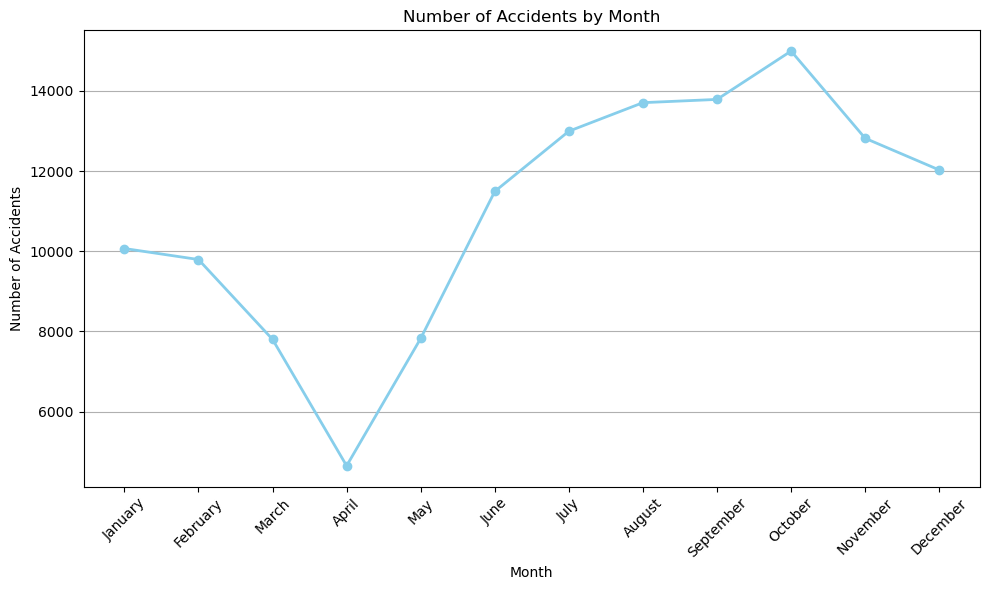

In [10]:
import matplotlib.pyplot as plt

# Group by month and count the number of accidents
accidents_by_month = person['MONTH'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(accidents_by_month.index, accidents_by_month.values, marker='o', color='skyblue', linestyle='-', linewidth=2)
plt.title('Number of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(1, 13), labels=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()



Let's understand age a bit more.

In [11]:
person['AGE'].value_counts().sort_index()

AGE
0       446
1       712
2       631
3       653
4       714
       ... 
114       1
119       6
120       2
998    9451
999    1258
Name: count, Length: 108, dtype: int64

This needs a bit of cleaning.

In [12]:
import numpy as np

# Calculate the mean of the AGE column, excluding 998 and 999, and apply ceiling
age_mean_ceiling = int(np.ceil(person.loc[~person['AGE'].isin([998, 999]), 'AGE'].mean()))
age_mean_ceiling



38

In [13]:
# Replace 998 and 999 with the calculated mean
person['AGE'] = person['AGE'].replace({998: age_mean_ceiling, 999: age_mean_ceiling})
person['AGE'].value_counts().sort_index()

AGE
0      446
1      712
2      631
3      653
4      714
      ... 
101      1
107      1
114      1
119      6
120      2
Name: count, Length: 106, dtype: int64

/Users/connorsteele/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


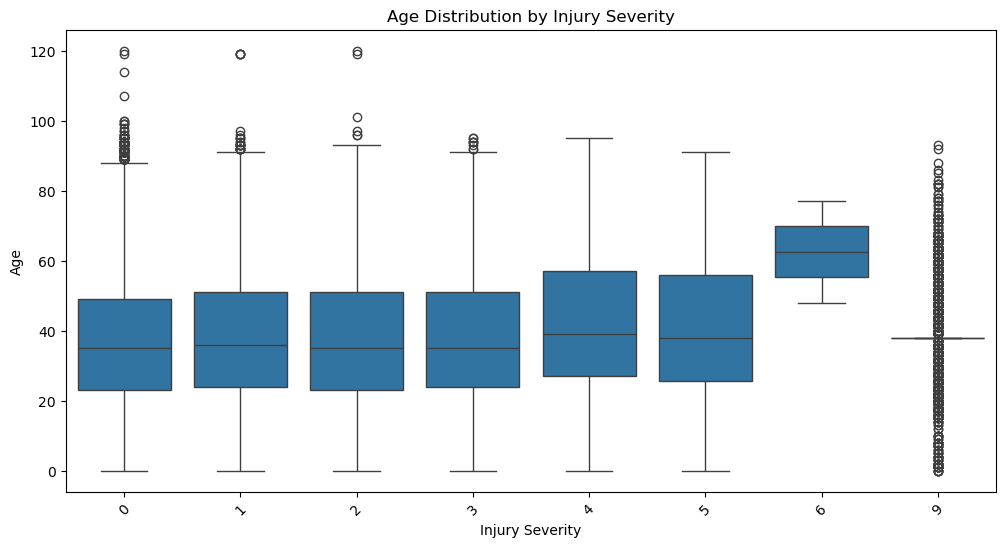

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot age distribution by injury severity
plt.figure(figsize=(12, 6))
sns.boxplot(person, x='INJ_SEV', y='AGE')
plt.title('Age Distribution by Injury Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


It appears older people in accidents have higher injury severity.

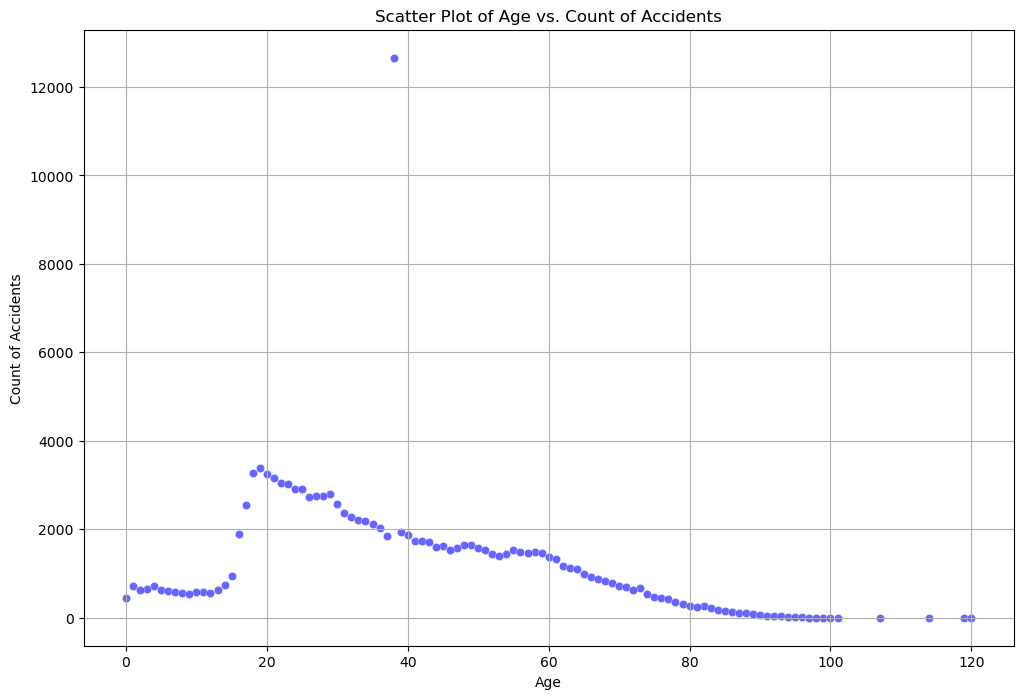

In [15]:
# Count occurrences of each age
age_counts = person['AGE'].value_counts().reset_index()
age_counts.columns = ['AGE', 'COUNT']

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=age_counts, x='AGE', y='COUNT', color='blue', alpha=0.6)
plt.title('Scatter Plot of Age vs. Count of Accidents')
plt.xlabel('Age')
plt.ylabel('Count of Accidents')
plt.grid()
plt.show()

/var/folders/b7/kcq1z8rd2xd2123cjmdz7bzm0000gp/T/ipykernel_88843/2459489517.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_event_counts, x='COUNT', y='HARM_EVNAME', palette='viridis')


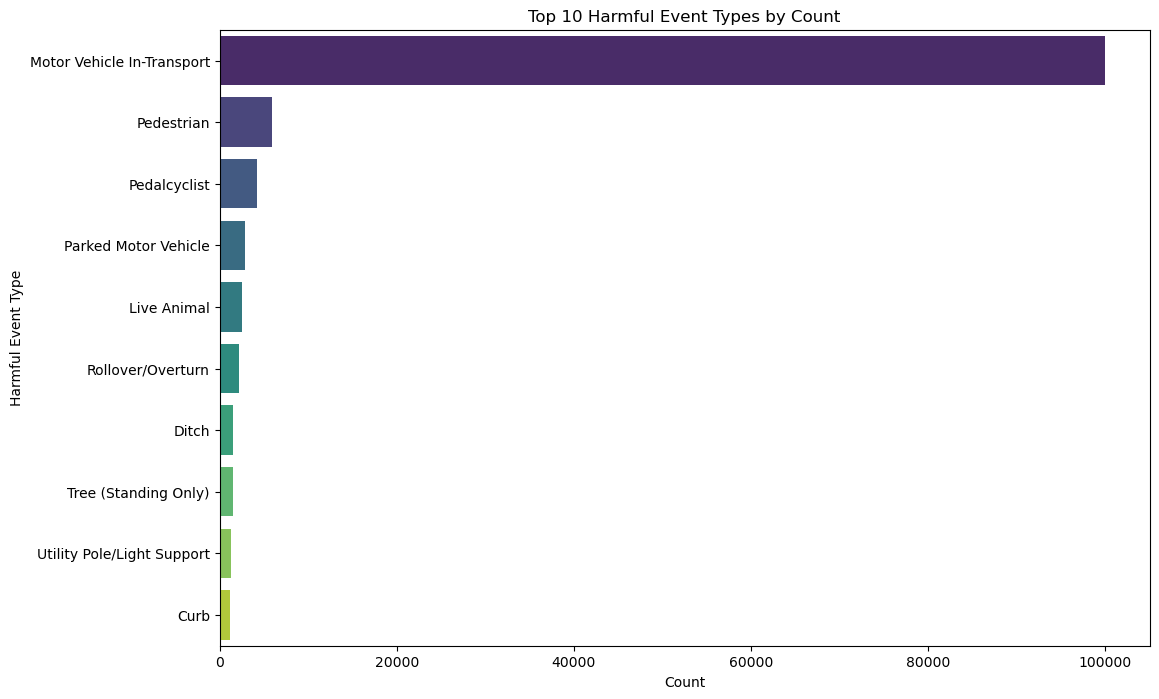

In [16]:
# Count occurrences of each harmful event type
event_counts = person['HARM_EVNAME'].value_counts().reset_index()
event_counts.columns = ['HARM_EVNAME', 'COUNT']

# Sort the values in descending order and select the top 10
top_event_counts = event_counts.sort_values(by='COUNT', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=top_event_counts, x='COUNT', y='HARM_EVNAME', palette='viridis')
plt.title('Top 10 Harmful Event Types by Count')
plt.xlabel('Count')
plt.ylabel('Harmful Event Type')
plt.show()


By far, motor vehicle-in-transport accidents are the most common types of accidents, followed by pedestrian and pedalcyclist.

What about by sex?

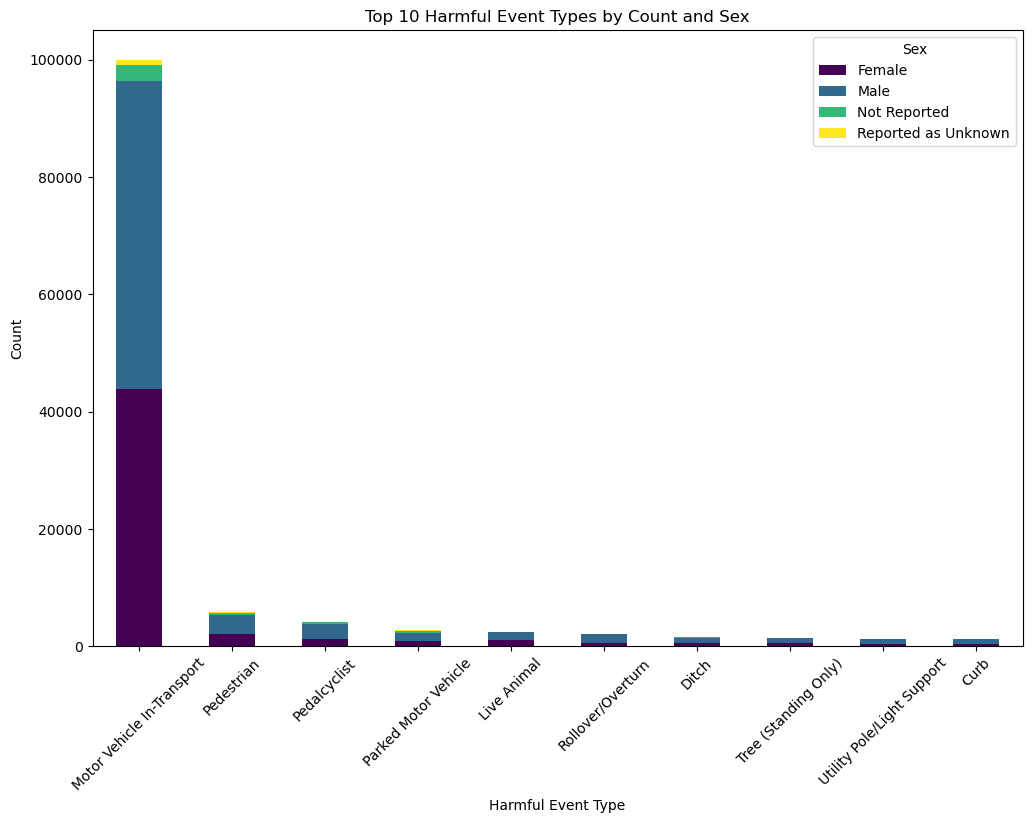

In [17]:
# Count occurrences of each harmful event type by sex
event_sex_counts = person.groupby(['HARM_EVNAME', 'SEXNAME']).size().unstack(fill_value=0)

# Sort the values to get the top 10 harmful event types
top_event_sex_counts = event_sex_counts.loc[event_sex_counts.sum(axis=1).nlargest(10).index]

# Create a stacked bar chart for top harmful event types by sex
top_event_sex_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

plt.title('Top 10 Harmful Event Types by Count and Sex')
plt.xlabel('Harmful Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Sex')
plt.show()


The distribution of sex among event type appears even.

/var/folders/b7/kcq1z8rd2xd2123cjmdz7bzm0000gp/T/ipykernel_88843/3288901328.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_average_age, x='AGE', y='HARM_EVNAME', palette='viridis')


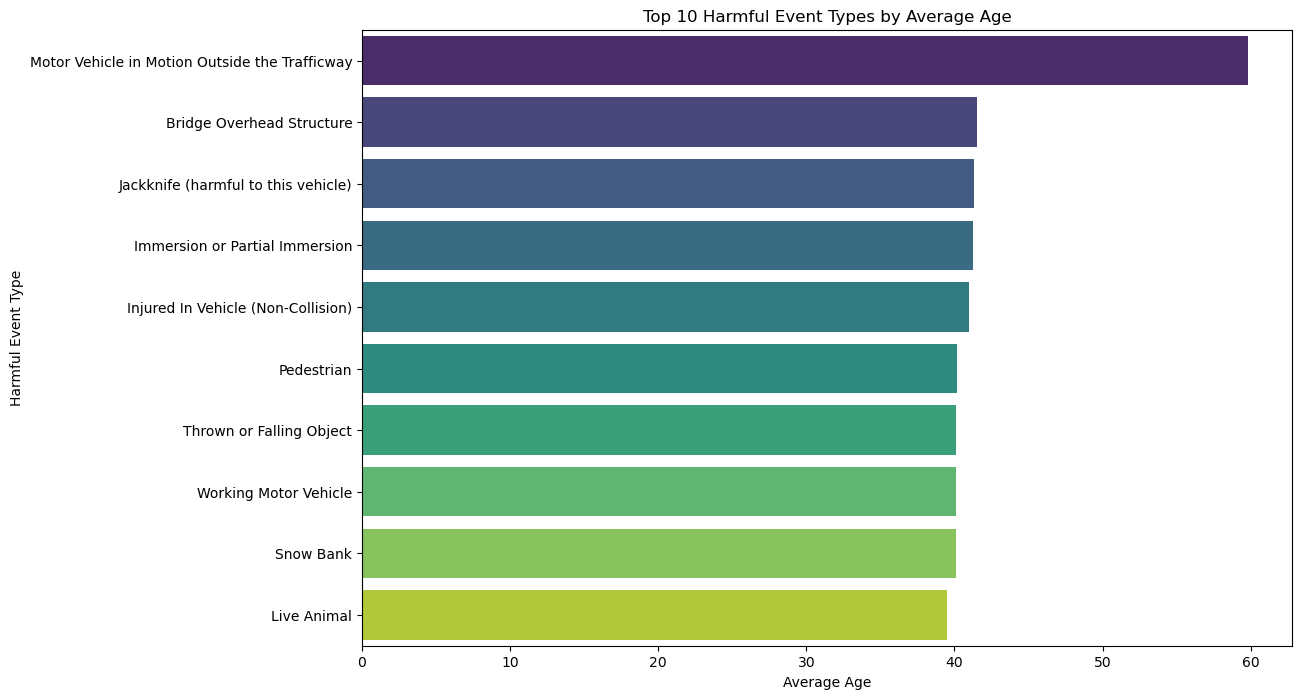

In [18]:
# Calculate the average age for each harmful event type
average_age = person.groupby('HARM_EVNAME')['AGE'].mean().reset_index()

# Sort the values in descending order and select the top 10
top_average_age = average_age.sort_values(by='AGE', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=top_average_age, x='AGE', y='HARM_EVNAME', palette='viridis')
plt.title('Top 10 Harmful Event Types by Average Age')
plt.xlabel('Average Age')
plt.ylabel('Harmful Event Type')
plt.show()


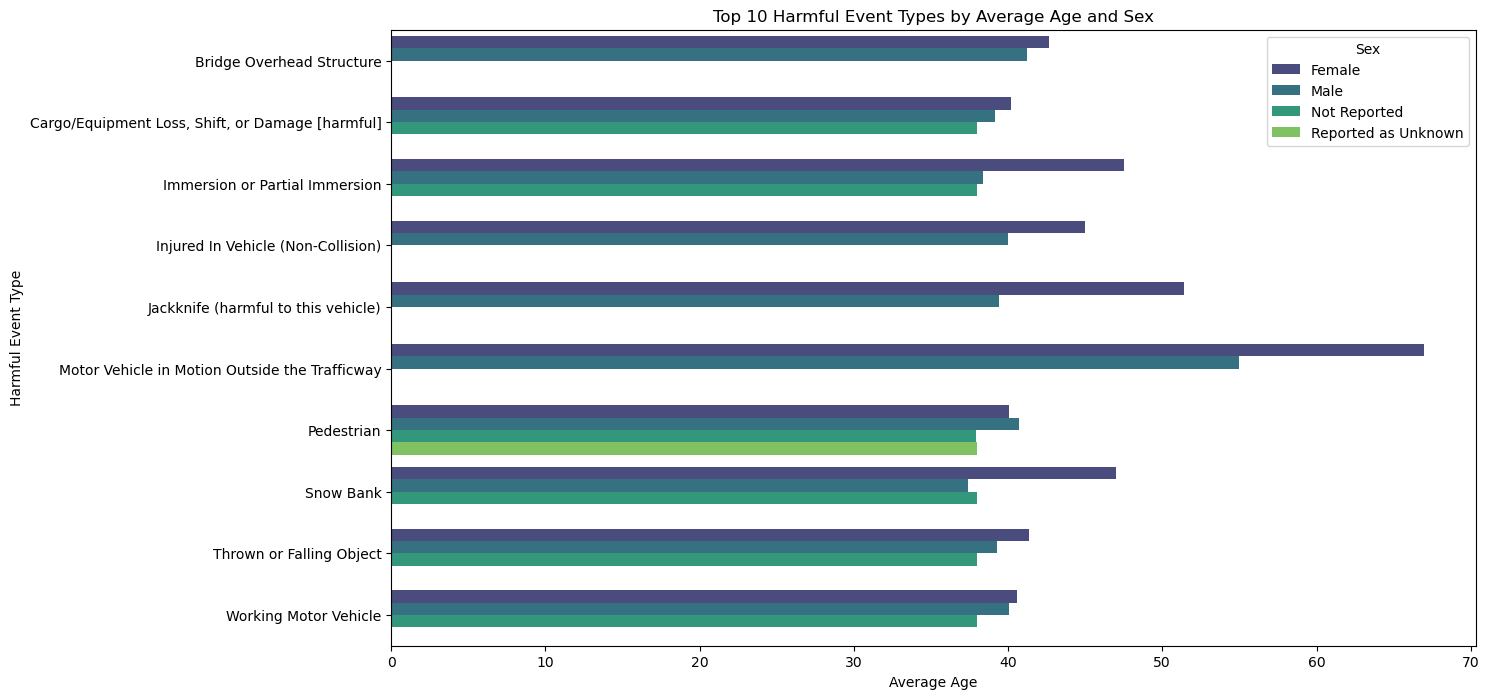

In [19]:
# Calculate the average age for each harmful event type and sex
average_age_sex = person.groupby(['HARM_EVNAME', 'SEXNAME'])['AGE'].mean().reset_index()

# Sort the values by average age in descending order and keep only the top 10 harmful event types
top_harmful_events = average_age_sex.groupby('HARM_EVNAME')['AGE'].mean().reset_index()
top_harmful_events = top_harmful_events.sort_values(by='AGE', ascending=False).head(10)

# Filter the average age data to include only the top 10 harmful events
filtered_data = average_age_sex[average_age_sex['HARM_EVNAME'].isin(top_harmful_events['HARM_EVNAME'])]

# Create a bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=filtered_data, x='AGE', y='HARM_EVNAME', hue='SEXNAME', palette='viridis')
plt.title('Top 10 Harmful Event Types by Average Age and Sex')
plt.xlabel('Average Age')
plt.ylabel('Harmful Event Type')
plt.legend(title='Sex')
plt.show()


/var/folders/b7/kcq1z8rd2xd2123cjmdz7bzm0000gp/T/ipykernel_88843/3185913065.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_age_man_coll, y='MAN_COLLNAME', x='AGE', palette='viridis')


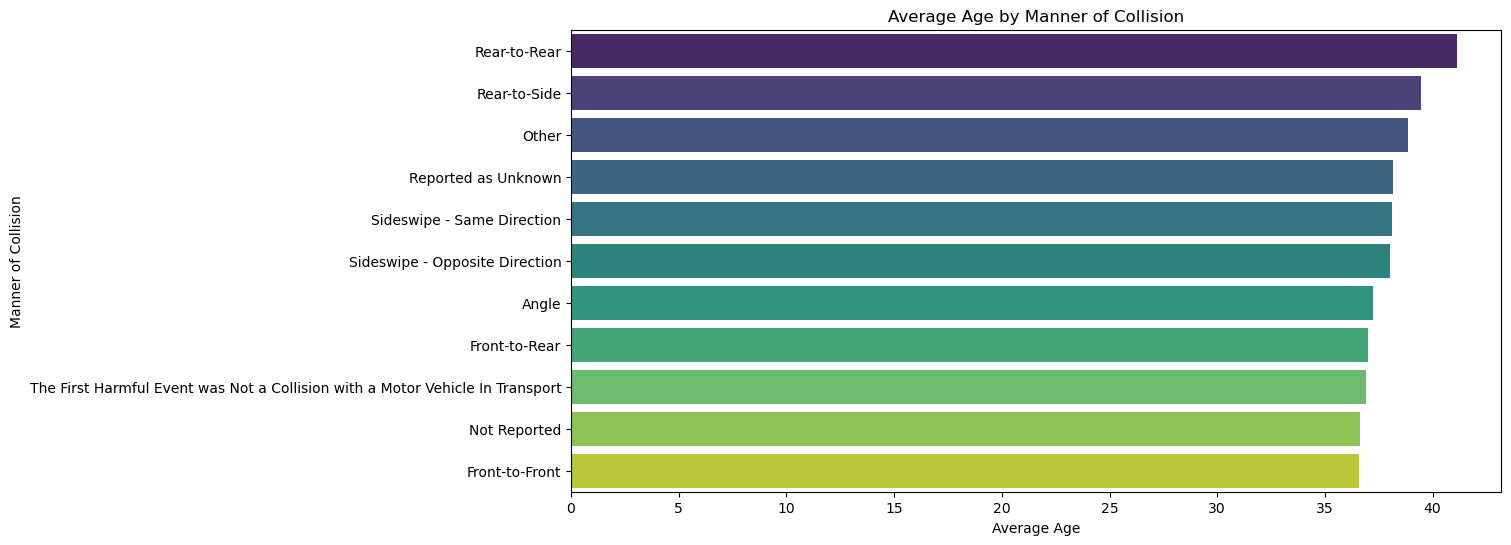

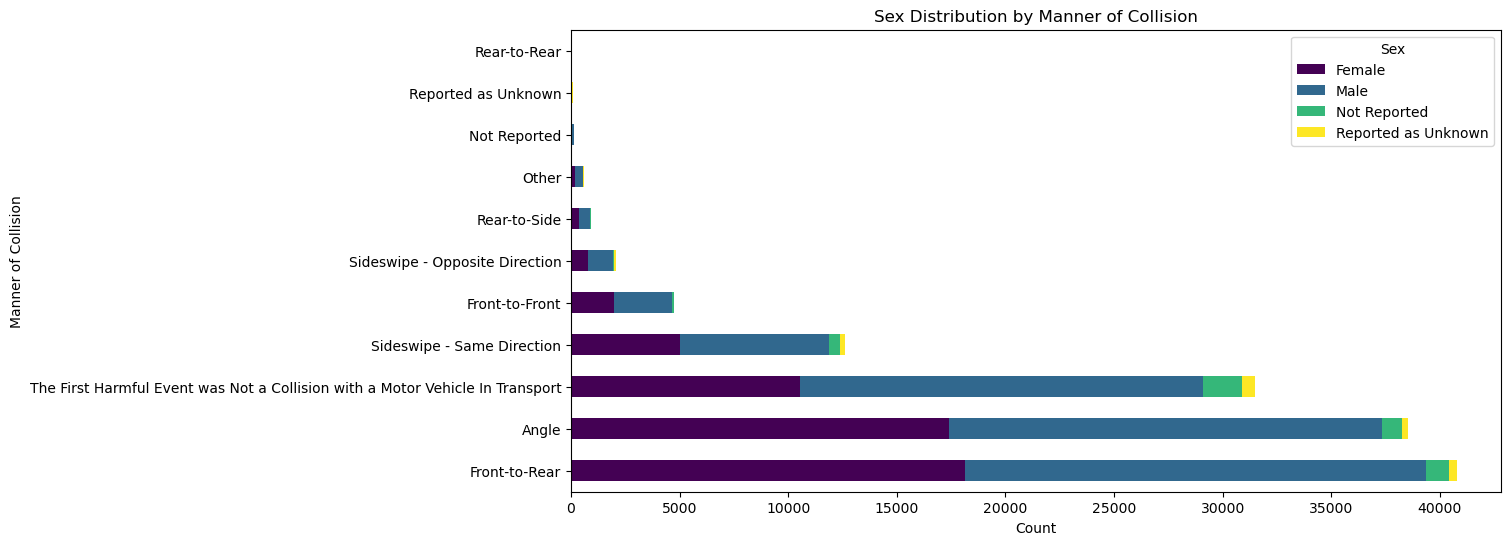

In [20]:
# Average age by manner of collision
average_age_man_coll = person.groupby('MAN_COLLNAME')['AGE'].mean().reset_index()

# Sort the average age values in descending order
average_age_man_coll = average_age_man_coll.sort_values(by='AGE', ascending=False)

# Create a horizontal bar chart for average age by manner of collision
plt.figure(figsize=(12, 6))
sns.barplot(data=average_age_man_coll, y='MAN_COLLNAME', x='AGE', palette='viridis')
plt.title('Average Age by Manner of Collision')
plt.ylabel('Manner of Collision')
plt.xlabel('Average Age')
plt.show()

# Sex distribution by manner of collision
sex_distribution = person.groupby(['MAN_COLLNAME', 'SEXNAME']).size().unstack(fill_value=0)

# Sort the sex distribution by the total count of each collision type
sex_distribution = sex_distribution.loc[sex_distribution.sum(axis=1).sort_values(ascending=False).index]

# Create a stacked horizontal bar chart for sex distribution by manner of collision
sex_distribution.plot(kind='barh', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Sex Distribution by Manner of Collision')
plt.ylabel('Manner of Collision')
plt.xlabel('Count')
plt.legend(title='Sex')
plt.show()


/var/folders/b7/kcq1z8rd2xd2123cjmdz7bzm0000gp/T/ipykernel_88843/3071944568.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_collision_counts, y='MAN_COLLNAME', x='COUNT', palette='viridis')


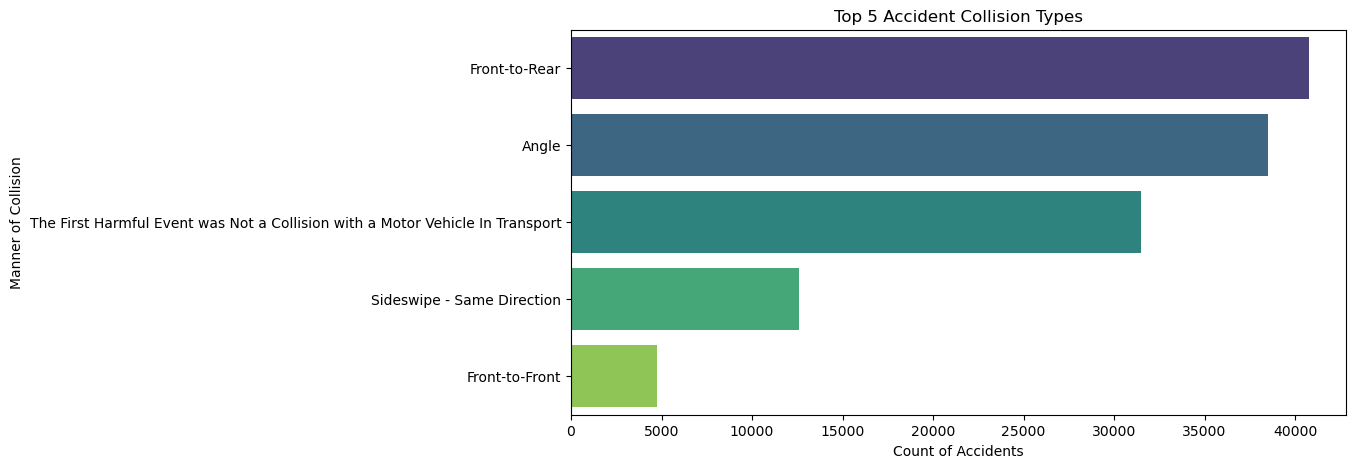

In [21]:
# Count of each manner of collision
collision_counts = person['MAN_COLLNAME'].value_counts().reset_index()
collision_counts.columns = ['MAN_COLLNAME', 'COUNT']

# Sort the DataFrame in descending order by count and select the top 5
top_collision_counts = collision_counts.sort_values(by='COUNT', ascending=False).head(5)

# Create a horizontal bar chart for the counts of the top 5 collision types
plt.figure(figsize=(10, 5))
sns.barplot(data=top_collision_counts, y='MAN_COLLNAME', x='COUNT', palette='viridis')
plt.title('Top 5 Accident Collision Types')
plt.ylabel('Manner of Collision')
plt.xlabel('Count of Accidents')
plt.show()




Front-to-rear and angle collision types dominate.

/var/folders/b7/kcq1z8rd2xd2123cjmdz7bzm0000gp/T/ipykernel_88843/2473351905.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rural_accident_counts, x='Count', y='MAN_COLLNAME', palette='viridis')


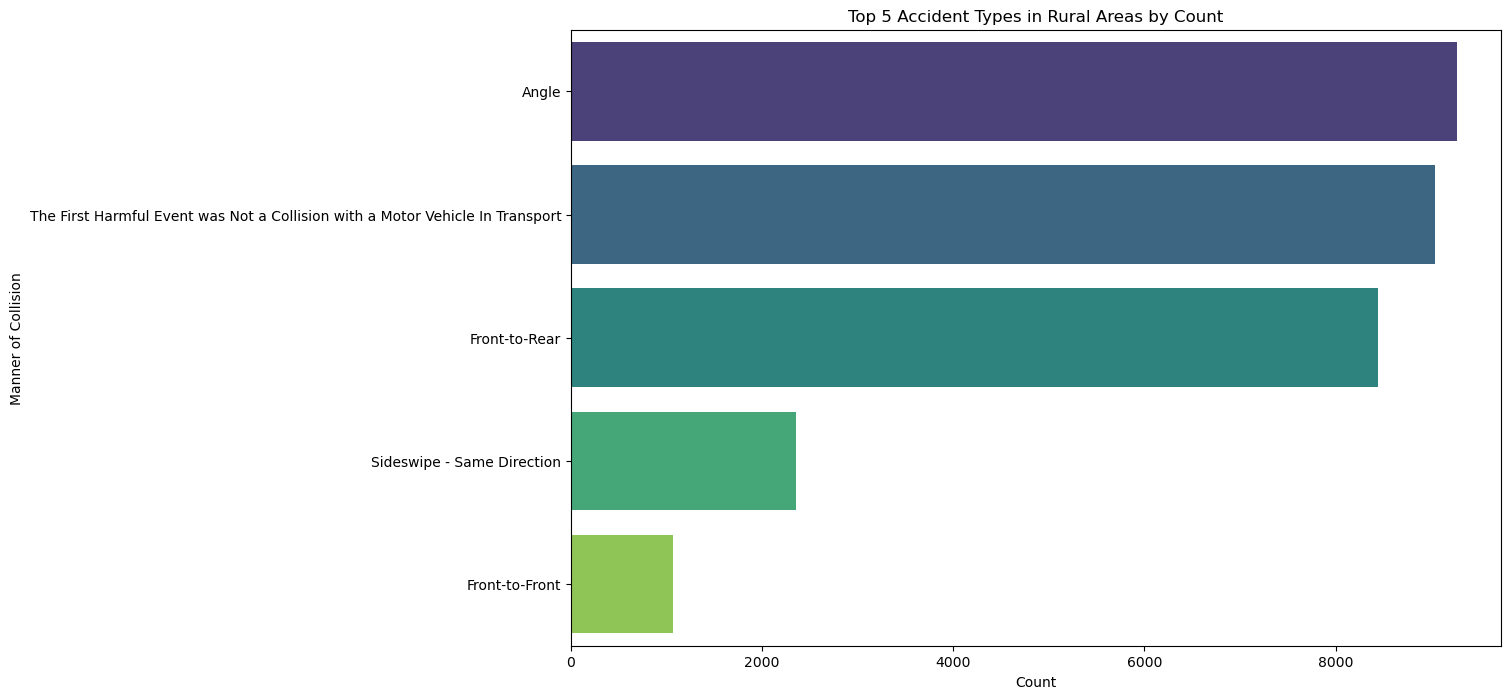

In [22]:
# Count of accidents by manner of collision in rural areas
rural_accident_counts = person[person['URBANICITYNAME'] == 'Rural Area'].groupby('MAN_COLLNAME').size().reset_index(name='Count')

# Sort the counts in descending order and select the top 5
top_rural_accident_counts = rural_accident_counts.sort_values(by='Count', ascending=False).head(5)

# Create a bar chart for top accident types in rural areas
plt.figure(figsize=(12, 8))
sns.barplot(data=top_rural_accident_counts, x='Count', y='MAN_COLLNAME', palette='viridis')
plt.title('Top 5 Accident Types in Rural Areas by Count')
plt.xlabel('Count')
plt.ylabel('Manner of Collision')
plt.show()


/var/folders/b7/kcq1z8rd2xd2123cjmdz7bzm0000gp/T/ipykernel_88843/2729795649.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rural_accident_counts, x='Count', y='MAN_COLLNAME', palette='viridis')


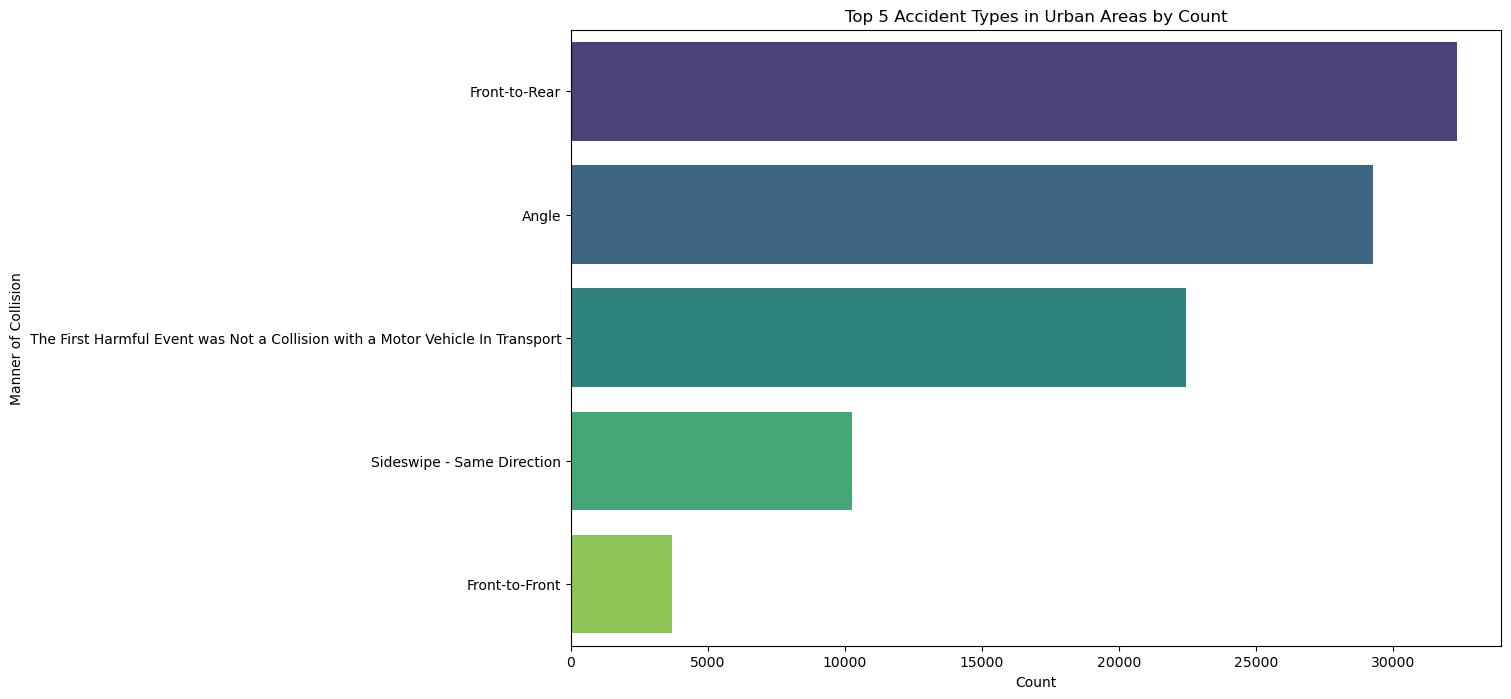

In [23]:
# Count of accidents by manner of collision in rural areas
rural_accident_counts = person[person['URBANICITYNAME'] == 'Urban Area'].groupby('MAN_COLLNAME').size().reset_index(name='Count')

# Sort the counts in descending order and select the top 5
top_rural_accident_counts = rural_accident_counts.sort_values(by='Count', ascending=False).head(5)

# Create a bar chart for top accident types in rural areas
plt.figure(figsize=(12, 8))
sns.barplot(data=top_rural_accident_counts, x='Count', y='MAN_COLLNAME', palette='viridis')
plt.title('Top 5 Accident Types in Urban Areas by Count')
plt.xlabel('Count')
plt.ylabel('Manner of Collision')
plt.show()

Conclusion: age and sex do appear to play a role in accident types.  For example, "motor vehicle in motion outside of a trafficway" is the most common accident type among the oldest of individuals surveyed in this sample.
The number one accident type for rural areas is Angle. In urban areas, it is front-to-rear.
People in their early 20s have the most accidents as well.
